In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import GPy

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [154]:
m = GPy.examples.regression.sparse_GP_regression_1D(optimize=False, plot=False)

In [158]:
m.predict(X)[1].shape

(50, 1)

In [3]:
print(m)


Name : sparse_gp
Objective : 473.6182940355885
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     1.0  |      +ve      |        
  rbf.lengthscale          |     1.0  |      +ve      |        
  Gaussian_noise.variance  |     1.0  |      +ve      |        


In [4]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [5]:
m.rbf

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [7]:
m[".*var"]

sparse_gp.rbf.variance:
Param([1.])
sparse_gp.Gaussian_noise.variance:
Param([1.])

In [15]:
m[".*var"] = [2., 3.]
print(m)
m.optimize()
print(m)


Name : sparse_gp
Objective : 652.6994391941718
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |   value  |  constraints  |  priors
  inducing_inputs          |  (5, 1)  |               |        
  rbf.variance             |     2.0  |      +ve      |        
  rbf.lengthscale          |     1.0  |      +ve      |        
  Gaussian_noise.variance  |     3.0  |      +ve      |        

Name : sparse_gp
Objective : -595.0441429303755
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  sparse_gp.               |                 value  |  constraints  |  priors
  inducing_inputs          |                (5, 1)  |               |        
  rbf.variance             |    2.0042773523057074  |      +ve      |        
  rbf.lengthscale          |    2.6270463809308717  |      +ve      |        
  Gaussian_noise.variance  |  0.002621530342443036  |      +ve      |        


{'inducing': <matplotlib.collections.PathCollection at 0x7ff67db3e2b0>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x7ff67db3e710>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67db3e588>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67db3ea58>]}

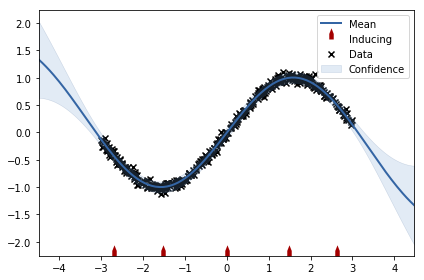

In [16]:
m.plot()

In [17]:
print(m[""])

  index  |          sparse_gp.inducing_inputs  |  constraints  |  priors
  [0 0]  |                        -2.69247920  |               |        
  [1 0]  |                         1.48960031  |               |        
  [2 0]  |                         0.00139477  |               |        
  [3 0]  |                         2.61912366  |               |        
  [4 0]  |                        -1.52032744  |               |        
  -----  |             sparse_gp.rbf.variance  |  -----------  |  ------
  [0]    |                         2.00427735  |      +ve      |        
  -----  |          sparse_gp.rbf.lengthscale  |  -----------  |  ------
  [0]    |                         2.62704638  |      +ve      |        
  -----  |  sparse_gp.Gaussian_noise.variance  |  -----------  |  ------
  [0]    |                         0.00262153  |      +ve      |        


{'inducing': <matplotlib.collections.PathCollection at 0x7ff67da42ba8>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x7ff67da4d048>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67da42e80>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67da4d470>]}

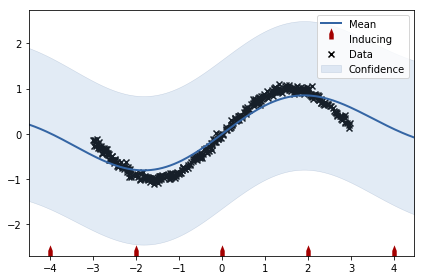

In [20]:
m[:] = np.r_[[-4,-2,0,2,4], [.1,2], [.7]]
m.plot()

{'inducing': <matplotlib.collections.PathCollection at 0x7ff67d9d7da0>,
 'dataplot': [<matplotlib.collections.PathCollection at 0x7ff67d9e2240>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67d9e20b8>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67d9e2668>]}

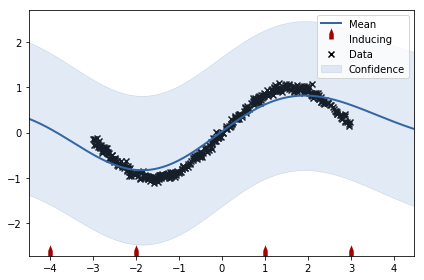

In [29]:
m.inducing_inputs[2:, 0] = [1,3,5]
m.plot()

In [31]:
precision = 1/m.Gaussian_noise.variance
precision

array([1.42857143])

In [35]:
m.Gaussian_noise.variational_expectations

<bound method Gaussian.variational_expectations of <GPy.likelihoods.gaussian.Gaussian object at 0x7ff681e3e860>>

{'covariance': [[<matplotlib.lines.Line2D at 0x7ff67ce673c8>]]}

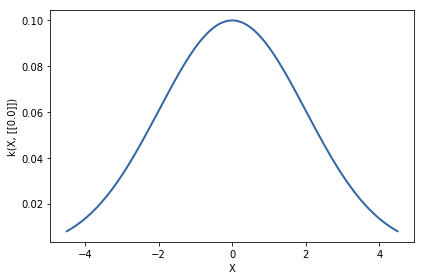

In [40]:
m.rbf.plot()

In [43]:
print(m.rbf.gradient)
print(m.gradient)

[105.78533844 -13.20305446]
[   2.4515349     4.04725341    1.22939933   -0.45715871   -0.35859054
  105.78533844  -13.20305446 -267.95767014]


In [44]:
m.optimize()
m.gradient

array([ 2.62226856e-03,  3.17559710e-05,  1.60616565e-03,  2.70017398e-03,
        9.88452208e-04,  4.35250325e-03, -2.32631964e-04,  8.42774445e-01])

In [45]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,2.0016698107291635,+ve,
rbf.lengthscale,2.6268793064292826,+ve,
Gaussian_noise.variance,0.0026214512193218483,+ve,


In [56]:
m.rbf.variance.unconstrain()

array([], dtype=int64)

In [61]:
m.rbf.variance.constrain_positive()
m.optimize()
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,2.0042980289974666,+ve,
rbf.lengthscale,2.6270590982257294,+ve,
Gaussian_noise.variance,0.002621520230613292,+ve,


In [67]:
m.inducing_inputs[0].fix()

array([0])

In [68]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",{fixed},
rbf.variance,2.0042980289974666,+ve,
rbf.lengthscale,2.6270590982257294,+ve,
Gaussian_noise.variance,0.002621520230613292,+ve,


In [69]:
m.unfix()

array([0])

In [70]:
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,2.0042980289974666,+ve,
rbf.lengthscale,2.6270590982257294,+ve,
Gaussian_noise.variance,0.002621520230613292,+ve,


In [71]:
m.unconstrain()
m

sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,2.0042980289974666,,
rbf.lengthscale,2.6270590982257294,,
Gaussian_noise.variance,0.002621520230613292,,


In [80]:
m.rbf.constrain_bounded(3., 100.)
m.optimize_restarts()
m

reconstraining parameters sparse_gp.rbf


Optimization restart 1/10, f = 1052.0658334887253
Optimization restart 2/10, f = 1052.0658356282795
Optimization restart 3/10, f = 1052.008649571644
Optimization restart 4/10, f = 1052.0658409812527
Optimization restart 5/10, f = 1052.0086548805273
Optimization restart 6/10, f = 1052.0087655561065
Optimization restart 7/10, f = 1052.0086811575316
Optimization restart 8/10, f = 1052.008649940969
Optimization restart 9/10, f = 1052.008643594319
Optimization restart 10/10, f = 1052.065839293495


sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,3.00000043143305,"3.0,100.0",
rbf.lengthscale,4.477501163287212,"3.0,100.0",
Gaussian_noise.variance,30.0,fixed +ve,


In [78]:
m.rbf.unconstrain()
m.rbf.constrain_positive()
m.Gaussian_noise.variance.fix(30)
m.optimize_restarts()
m

Optimization restart 1/10, f = 1050.8501126161461
Optimization restart 2/10, f = 1050.8501084836673
Optimization restart 3/10, f = 1050.8501088305493
Optimization restart 4/10, f = 1050.850118295117
Optimization restart 5/10, f = 1050.8501105101836
Optimization restart 6/10, f = 1050.8501116175796
Optimization restart 7/10, f = 1050.8501086226627
Optimization restart 8/10, f = 1050.8501148528792
Optimization restart 9/10, f = 1050.8501086579963
Optimization restart 10/10, f = 1050.8501316018796


sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,0.28151922111976213,+ve,
rbf.lengthscale,1.3804035867552895,+ve,
Gaussian_noise.variance,30.0,fixed +ve,


In [83]:
m.Gaussian_noise.variance.unfix()
m.optimize_restarts()
m

Optimization restart 1/10, f = -588.4634330256813
Optimization restart 2/10, f = -558.3592975032007
Optimization restart 3/10, f = -588.4634303104103
Optimization restart 4/10, f = -538.7697829853714
Optimization restart 5/10, f = -588.4634309518951
Optimization restart 6/10, f = -588.46343022363
Optimization restart 7/10, f = -588.4634316568117
Optimization restart 8/10, f = -538.7701543530493
Optimization restart 9/10, f = -588.4623958419761
Optimization restart 10/10, f = -588.4634317860327


sparse_gp.,value,constraints,priors
inducing inputs,"(5, 1)",,
rbf.variance,4.805155281855253,"3.0,100.0",
rbf.lengthscale,3.0000000242403355,"3.0,100.0",
Gaussian_noise.variance,0.002707106944503016,+ve,


{'inducing': <matplotlib.collections.PathCollection at 0x7ff67c7a2da0>,
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67c7ac128>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67c7a2cf8>]}

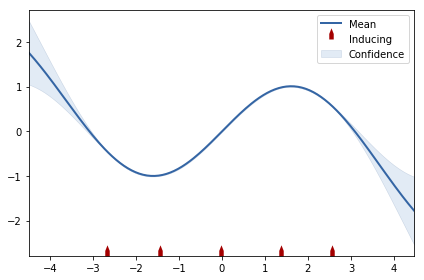

In [86]:
m.plot_f()

# GPR

In [87]:
X = np.random.uniform(-3., 3., (20, 1))
Y = np.sin(X) + np.random.randn(20, 1) * 0.05

In [88]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [90]:
m = GPy.models.GPRegression(X, Y, kernel)

In [93]:
m

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff67b2826a0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67b282630>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67b282b38>]}

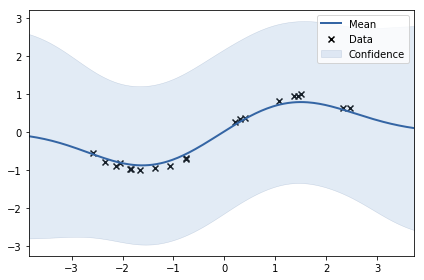

In [94]:
m.plot()

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff67b2563c8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67b256358>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67b256898>]}

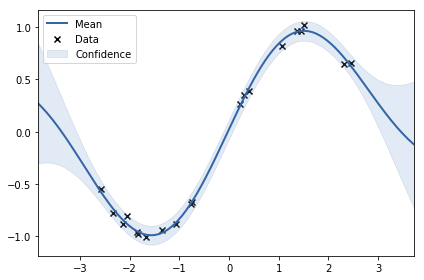

In [98]:
m.optimize(messages=True)
m.plot()

Optimization restart 1/10, f = -19.22709288184518
Optimization restart 2/10, f = -19.227092880013696
Optimization restart 3/10, f = -19.227092881182475
Optimization restart 4/10, f = -19.227092881618468
Optimization restart 5/10, f = -19.227092881842527
Optimization restart 6/10, f = -19.227092881096276
Optimization restart 7/10, f = -19.227092881844644
Optimization restart 8/10, f = -19.227092881830664
Optimization restart 9/10, f = -19.227092881844314
Optimization restart 10/10, f = -19.22709288184109


{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff67b1a5550>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff67b1a54e0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff67b1a5a20>]}

 /home/darth/projects/bopt/.venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


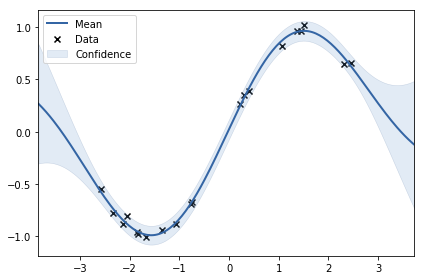

In [101]:
m.optimize_restarts(num_restarts=10)
m.plot()

In [121]:
GPy.plotting.change_plotting_library("matplotlib")

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff66aa60940>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7ff66aac50f0>]}

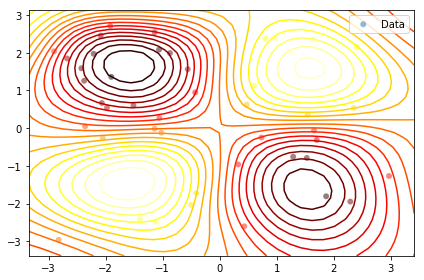

In [124]:
m.plot()

In [114]:
m

GP_regression.,value,constraints,priors
rbf.variance,0.7891686070436488,+ve,
rbf.lengthscale,1.8180705901099556,+ve,
Gaussian_noise.variance,0.00178085732211934,+ve,


In [126]:
X = np.random.uniform(-3., 3., (50, 2))
Y = np.sin(X[:, 0:1]) * np.sin(X[:, 1:2]) + np.random.randn(50, 1) * 0.05

In [127]:
kernel = GPy.kern.Matern52(2, ARD=True) + GPy.kern.White(2)

m = GPy.models.GPRegression(X, Y, kernel)

In [128]:
m.optimize(messages=True)

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff66a92bef0>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7ff66a92be48>]}

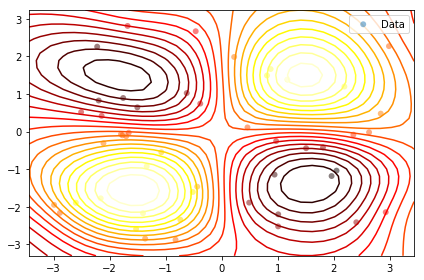

In [129]:
m.plot()

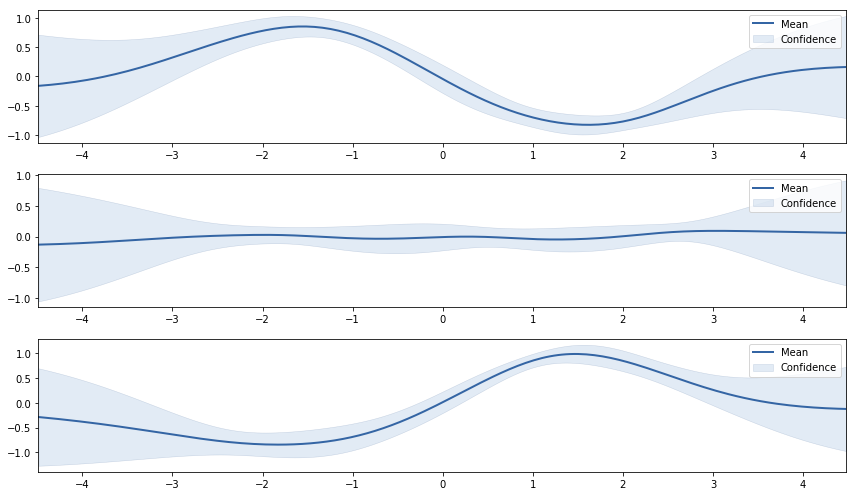

In [136]:
slices = [-1, 0, 1.5]

figure = GPy.plotting.plotting_library().figure(3, 1, figsize=(12,7))

for i, y in enumerate(slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1, y)], row=(i+1), plot_data=False)
    

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff6716bee10>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7ff6716beda0>]}

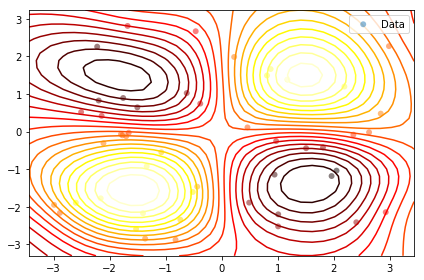

In [139]:
m.plot()

In [142]:
import GPy.models.state_space_model as SS_model

def state_space_example():
    X = np.linspace(0, 10, 2000)[:, None]
    Y = np.sin(X) + np.random.randn(*X.shape)*0.1

    kernel1 = GPy.kern.Matern32(X.shape[1])
    m1  = GPy.models.GPRegression(X,Y, kernel1)

    print(m1)
    m1.optimize(optimizer='bfgs',messages=True)

    print(m1)

    kernel2 = GPy.kern.sde_Matern32(X.shape[1])
    #m2  = SS_model.StateSpace(X,Y, kernel2)
    m2 = GPy.models.StateSpace(X,Y, kernel2)
    print(m2)

    m2.optimize(optimizer='bfgs',messages=True)

    print(m2)

    return m1, m2



In [143]:
state_space_example()


Name : GP regression
Objective : 1891.4725122162135
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  Mat32.variance           |    1.0  |      +ve      |        
  Mat32.lengthscale        |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        



Name : GP regression
Objective : -1745.4111614055128
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  Mat32.variance           |    2.6261431110686067  |      +ve      |        
  Mat32.lengthscale        |    5.4825035870413625  |      +ve      |        
  Gaussian_noise.variance  |  0.009570346568395683  |      +ve      |        

Name : StateSpace
Objective : 1891.4724959184618
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  StateSpace.              |  value  |  constraints  |  priors
  Mat32.variance           |    1.0  |      +ve      |        
  Mat32.lengthscale        |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        



Name : StateSpace
Objective : -1745.4111614055098
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  StateSpace.              |                 value  |  constraints  |  priors
  Mat32.variance           |      2.62614171386702  |      +ve      |        
  Mat32.lengthscale        |     5.482501169778502  |      +ve      |        
  Gaussian_noise.variance  |  0.009570356564084413  |      +ve      |        


(<GPy.models.gp_regression.GPRegression at 0x7ff68fb94f28>,
 <GPy.models.state_space_model.StateSpace at 0x7ff671555e10>)

In [144]:
a, b = _

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff670ab1940>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff670ab18d0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff670ab1e10>]}

/home/darth/projects/bopt/.venv/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



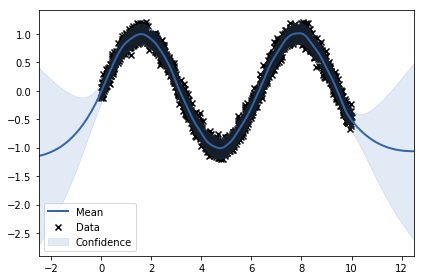

In [147]:
a.plot()

{'dataplot': [<matplotlib.collections.PathCollection at 0x7ff670de4cf8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7ff66af3a320>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7ff670de4ba8>]}

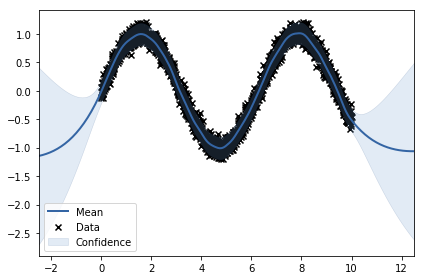

In [148]:
b.plot()

In [149]:
a

GP_regression.,value,constraints,priors
Mat32.variance,2.6261431110686067,+ve,
Mat32.lengthscale,5.4825035870413625,+ve,
Gaussian_noise.variance,0.009570346568395683,+ve,


In [150]:
b

StateSpace.,value,constraints,priors
Mat32.variance,2.62614171386702,+ve,
Mat32.lengthscale,5.482501169778502,+ve,
Gaussian_noise.variance,0.009570356564084413,+ve,


In [153]:
m.predict(np.array([[1., 3.]]))

(array([[0.3651622]]), array([[0.11024284]]))